# **Cyclistic Bikesharing analysis_Google Data analytics certificate**

By: Ammar Serageldin

**Introduction**
Cyclistic is a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, he wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, a new marketing strategy will be designed  to convert casual riders into annual members.

**About the company**  
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

**Objectives**  
How do annual members and casual riders use Cyclistic bikes differently?

**Data**  
12 months of Cyclistic trip data in year 2021

# Data Cleaning

Importing libraries

In [3]:
library("tidyverse") 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



1. Combine data of the 12 months in one file

In [5]:
# get a list of all data files in the data folder
files_list <- list.files('../input/cyclistic-bike-share-data-2021')

# create a dataframe for each file (12 files)
x <- 1
for (i in files_list){
  assign(paste("df",x, sep="_"), read.csv(paste('../input/cyclistic-bike-share-data-2021/',i, sep='')))
  x <- x+1
  }

In [6]:
# combine the files in one df
df <- bind_rows(df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12)

Take a glimpse on the df

In [48]:
glimpse(df)

Rows: 5,595,063
Columns: 13
$ ride_id            <chr> "E19E6F1B8D4C42ED", "DC88F20C2C55F27F", "EC45C94683…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-01-23 16:14:19", "2021-01-27 18:43:08", "2021…
$ ended_at           <chr> "2021-01-23 16:24:44", "2021-01-27 18:47:12", "2021…
$ start_station_name <chr> "California Ave & Cortez St", "California Ave & Cor…
$ start_station_id   <chr> "17660", "17660", "17660", "17660", "17660", "17660…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "Wood St & Augu…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "657", "13258",…
$ start_lat          <dbl> 41.90034, 41.90033, 41.90031, 41.90040, 41.90033, 4…
$ start_lng          <dbl> -87.69674, -87.69671, -87.69664, -87.69666, -87.696…
$ end_lat            <dbl> 41.89000, 41.90000, 41.90000, 41.92000, 41.90000, 4…
$ end_lng            <dbl> -87.72000, -87.69000, -87.70000, -87.69000, -87.700…
$ member_cas

The df consists of 13 variables and 5,595,063 observations over the year of 2021.  
Now, let's check a sample of the df:

In [10]:
head(df, 15)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89000,-87.72000,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90000,-87.69000,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90000,-87.70000,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92000,-87.69000,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90000,-87.70000,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94000,-87.71000,casual
7,09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,California Ave & Cortez St,17660,,,41.90039,-87.69676,41.90000,-87.71000,member
8,DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,California Ave & Cortez St,17660,,,41.90039,-87.69673,41.91000,-87.70000,member
9,C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,California Ave & Cortez St,17660,,,41.90031,-87.69680,41.90000,-87.70000,member


Checking the df, we find that "started_at" & "ended_at" columns have Chr type not datetime, and the empty values of the df are not shown as NA, so we need to fix that.

First, we convert empty values to NA

In [7]:
df <- mutate_all(df, list(~na_if(.,"")))
head(df,15)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NA,NA,41.90034,-87.69674,41.89000,-87.72000,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NA,NA,41.90033,-87.69671,41.90000,-87.69000,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NA,NA,41.90031,-87.69664,41.90000,-87.70000,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NA,NA,41.90040,-87.69666,41.92000,-87.69000,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NA,NA,41.90033,-87.69670,41.90000,-87.70000,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,NA,NA,41.90041,-87.69676,41.94000,-87.71000,casual
7,09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,California Ave & Cortez St,17660,NA,NA,41.90039,-87.69676,41.90000,-87.71000,member
8,DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,California Ave & Cortez St,17660,NA,NA,41.90039,-87.69673,41.91000,-87.70000,member
9,C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,California Ave & Cortez St,17660,NA,NA,41.90031,-87.69680,41.90000,-87.70000,member



Now the empty values are shown as NA.  
Then we convert type of  "started_at" & "ended_at" columns

In [8]:
df$started_at <- as.POSIXct(df$started_at, format="%Y-%m-%d %H:%M:%OS",tz=Sys.timezone())
df$ended_at <- as.POSIXct(df$ended_at,format="%Y-%m-%d %H:%M:%OS",tz=Sys.timezone())

In [51]:
glimpse(df)

Rows: 5,595,063
Columns: 13
$ ride_id            <chr> "E19E6F1B8D4C42ED", "DC88F20C2C55F27F", "EC45C94683…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2021-01-23 16:14:19, 2021-01-27 18:43:08, 2021-01-…
$ ended_at           <dttm> 2021-01-23 16:24:44, 2021-01-27 18:47:12, 2021-01-…
$ start_station_name <chr> "California Ave & Cortez St", "California Ave & Cor…
$ start_station_id   <chr> "17660", "17660", "17660", "17660", "17660", "17660…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, "Wood St & Augu…
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, "657", "13258",…
$ start_lat          <dbl> 41.90034, 41.90033, 41.90031, 41.90040, 41.90033, 4…
$ start_lng          <dbl> -87.69674, -87.69671, -87.69664, -87.69666, -87.696…
$ end_lat            <dbl> 41.89000, 41.90000, 41.90000, 41.92000, 41.90000, 4…
$ end_lng            <dbl> -87.72000, -87.69000, -87.70000, -87.69000, -87.700…
$ member_cas

 
Time to check how many NAs in each column.

In [52]:
map(df, ~sum(is.na(.)))

$ride_id
[1] 0

$rideable_type
[1] 0

$started_at
[1] 0

$ended_at
[1] 0

$start_station_name
[1] 690809

$start_station_id
[1] 690806

$end_station_name
[1] 739170

$end_station_id
[1] 739170

$start_lat
[1] 0

$start_lng
[1] 0

$end_lat
[1] 4771

$end_lng
[1] 4771

$member_casual
[1] 0

Start station name & id are missing ~690,000 values and End station name & id are missing ~740,000 values.  
Those are ~13% of the whole dataset, which is a big share.  

End latitude and longitude is missing ~50,000 values, which is only 1% of the dataset.

Check if values of station name & id are missing in the same observations. 

In [21]:
# Start station 
map(df[with(df, is.na(start_station_name)& is.na(start_station_id)),], ~sum(is.na(.)))

$ride_id
[1] 0

$rideable_type
[1] 0

$started_at
[1] 0

$ended_at
[1] 0

$start_station_name
[1] 690806

$start_station_id
[1] 690806

$end_station_name
[1] 423216

$end_station_id
[1] 423216

$start_lat
[1] 0

$start_lng
[1] 0

$end_lat
[1] 0

$end_lng
[1] 0

$member_casual
[1] 0

In [22]:
# End station
map(df[with(df, is.na(end_station_id)& is.na(end_station_name)),], ~sum(is.na(.)))

$ride_id
[1] 0

$rideable_type
[1] 0

$started_at
[1] 0

$ended_at
[1] 0

$start_station_name
[1] 423218

$start_station_id
[1] 423216

$end_station_name
[1] 739170

$end_station_id
[1] 739170

$start_lat
[1] 0

$start_lng
[1] 0

$end_lat
[1] 4771

$end_lng
[1] 4771

$member_casual
[1] 0

Values of station name & id are missing in the same observations for both Start & End stations.  
Missing End latitude & longitude values are all included in the missing end station & id observations.  

We can check if station id is missing in start & end at the same observations

In [23]:
map(df[with(df, is.na(start_station_id)& is.na(end_station_id)),], ~sum(is.na(.)))

$ride_id
[1] 0

$rideable_type
[1] 0

$started_at
[1] 0

$ended_at
[1] 0

$start_station_name
[1] 423216

$start_station_id
[1] 423216

$end_station_name
[1] 423216

$end_station_id
[1] 423216

$start_lat
[1] 0

$start_lng
[1] 0

$end_lat
[1] 0

$end_lng
[1] 0

$member_casual
[1] 0

Only ~420,000 missing values are common in both start and end stations.

Since the missing values make a big share of the dataset and are not directly affecting the results, we can proceed the analysis keeping them for now.

So, let's check if all ride IDs are unique.

In [54]:
n_distinct(df$ride_id)

[1] 5595063

This is the same number of total observations. Hence, all IDs are unique.

let's check if member_casual column only have "member" or "casual" values.

In [24]:
unique(df$member_casual)

[1] "member" "casual"

Great, now let's check the types of bikes available.

In [25]:
unique(df$rideable_type)

[1] "electric_bike" "classic_bike"  "docked_bike"

There are 3 types of bike available for renting in Cyclistic; classic, electric & docked bikes.

# Processing the data

Let's start by calculating interesting variables...  

First, we calculate the ride length in minutes.

In [9]:
df['ride_length_mins'] = df$ended_at - df$started_at
df['ride_length_mins'] = round(as.numeric(df$ride_length, units='mins'), digits = 0)

We need to remove observations with negative values, zero or 1 minute in ride length, as this makes no sense.  
Also, rides that are longer than 24 hours are most probably caused by failure in returning the bike, so we can ignore them.

In [29]:
sum(df$ride_length_mins < 0)
sum(df$ride_length_mins == 0)
sum(df$ride_length_mins > 0 & df$ride_length_mins <= 1)
sum(df$ride_length_mins > 24*60)

[1] 85

[1] 56129

[1] 57598

[1] 4015

There are **85** observations where **end time < start time**, **56,129** where **end time = start time**, **57,598** where **ride length = 1** & **4,015** where **ride length > 24 hours**.

This could indicate issues with the app or unlocking the bike, which needs a separate analysis.  
We can remove these observations.

In [30]:
df <- df[(df$ride_length_mins > 1 & df$ride_length_mins <= 24*60),]

Then, we get the day of week and month of the ride from the start date.

In [31]:
df['day_of_week'] = weekdays(df$started_at)
df['month'] = as.numeric(strftime(df$started_at,"%m"))

Days of week need to be sorted in the right order starting the week with Monday.

In [85]:
df$day_of_week <- factor(df$day_of_week, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

We can also get an estimate of the riding distance, by calculating the distance between the start and end station.  
For that, we need to import the "geosphere" library.

In [32]:
library("geosphere")

We had 4,771 values missing in end_lng & end_lat.  
Let's remove those observations first.

In [33]:
df <- df[with(df, !is.na(end_lng) | !is.na(end_lat)),]

Then add the distance in meters.

In [34]:
df['ride_distance_m'] = round(distHaversine(df[,c('start_lng', 'start_lat')], df[,c('end_lng', 'end_lat')]), digits = 0)

If the start and end stations are the same, this will obviously give a zero distance.  
So let's add a new column to indicate if this is true.

In [35]:
# Only if start or end stations are not NA
df['start=end'] = df$start_station_id==df$end_station_id & !is.na(df$start_station_id) & !is.na(df$end_station_id)

Let's take a glimpse after processing the data.

In [38]:
glimpse(df)

Rows: 5,475,185
Columns: 18
$ ride_id            <chr> "E19E6F1B8D4C42ED", "DC88F20C2C55F27F", "4FA453A75A…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2021-01-23 16:14:19, 2021-01-27 18:43:08, 2021-01-…
$ ended_at           <dttm> 2021-01-23 16:24:44, 2021-01-27 18:47:12, 2021-01-…
$ start_station_name <chr> "California Ave & Cortez St", "California Ave & Cor…
$ start_station_id   <chr> "17660", "17660", "17660", "17660", "17660", "17660…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, "Wood St & Augusta Blvd…
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, "657", "13258", "657", …
$ start_lat          <dbl> 41.90034, 41.90033, 41.90040, 41.90041, 41.90039, 4…
$ start_lng          <dbl> -87.69674, -87.69671, -87.69666, -87.69676, -87.696…
$ end_lat            <dbl> 41.89000, 41.90000, 41.92000, 41.94000, 41.90000, 4…
$ end_lng            <dbl> -87.72000, -87.69000, -87.69000, -87.71000, -87.710…
$ member_cas

# Analyze

The aim is to analyze the data to understand the main difference between member and casual users of Cyclistic.

Skimr is a helpful package for inspecting data

In [36]:
library("skimr")

Start by inspecting the data.  

In [44]:
summary(df)

   ride_id          rideable_type        started_at                 
 Length:5475185     Length:5475185     Min.   :2021-01-01 00:02:05  
 Class :character   Class :character   1st Qu.:2021-06-06 22:48:35  
 Mode  :character   Mode  :character   Median :2021-08-01 01:33:34  
                                       Mean   :2021-07-29 06:36:12  
                                       3rd Qu.:2021-09-24 15:32:39  
                                       Max.   :2021-12-31 23:59:48  
    ended_at                   start_station_name start_station_id  
 Min.   :2021-01-01 00:08:39   Length:5475185     Length:5475185    
 1st Qu.:2021-06-06 23:21:11   Class :character   Class :character  
 Median :2021-08-01 01:57:21   Mode  :character   Mode  :character  
 Mean   :2021-07-29 06:55:59                                        
 3rd Qu.:2021-09-24 15:52:03                                        
 Max.   :2022-01-01 12:17:58                                        
 end_station_name   end_station_id

From inspecting the data, we already get some insights;  
* The average ride length = 20 mins
* The average ride distance = 2 km. The max is 115 Km.
* There are ~270,000 rides that ended in the same station as started around 5% only.

**Ride count**  

How many rides for each type of users? 

In [80]:
sum(df$member_casual=='member')
sum(df$member_casual=='casual')

[1] 2994354

[1] 2480120

* Member rides make ~55% of the total rides
* Casual rides make ~45% 

**Ride length**

Plotting a histogram of the ride length.

In [54]:
options(repr.plot.width=30, repr.plot.height=8)

Warning message:
“Removed 89485 rows containing non-finite values (stat_bin).”


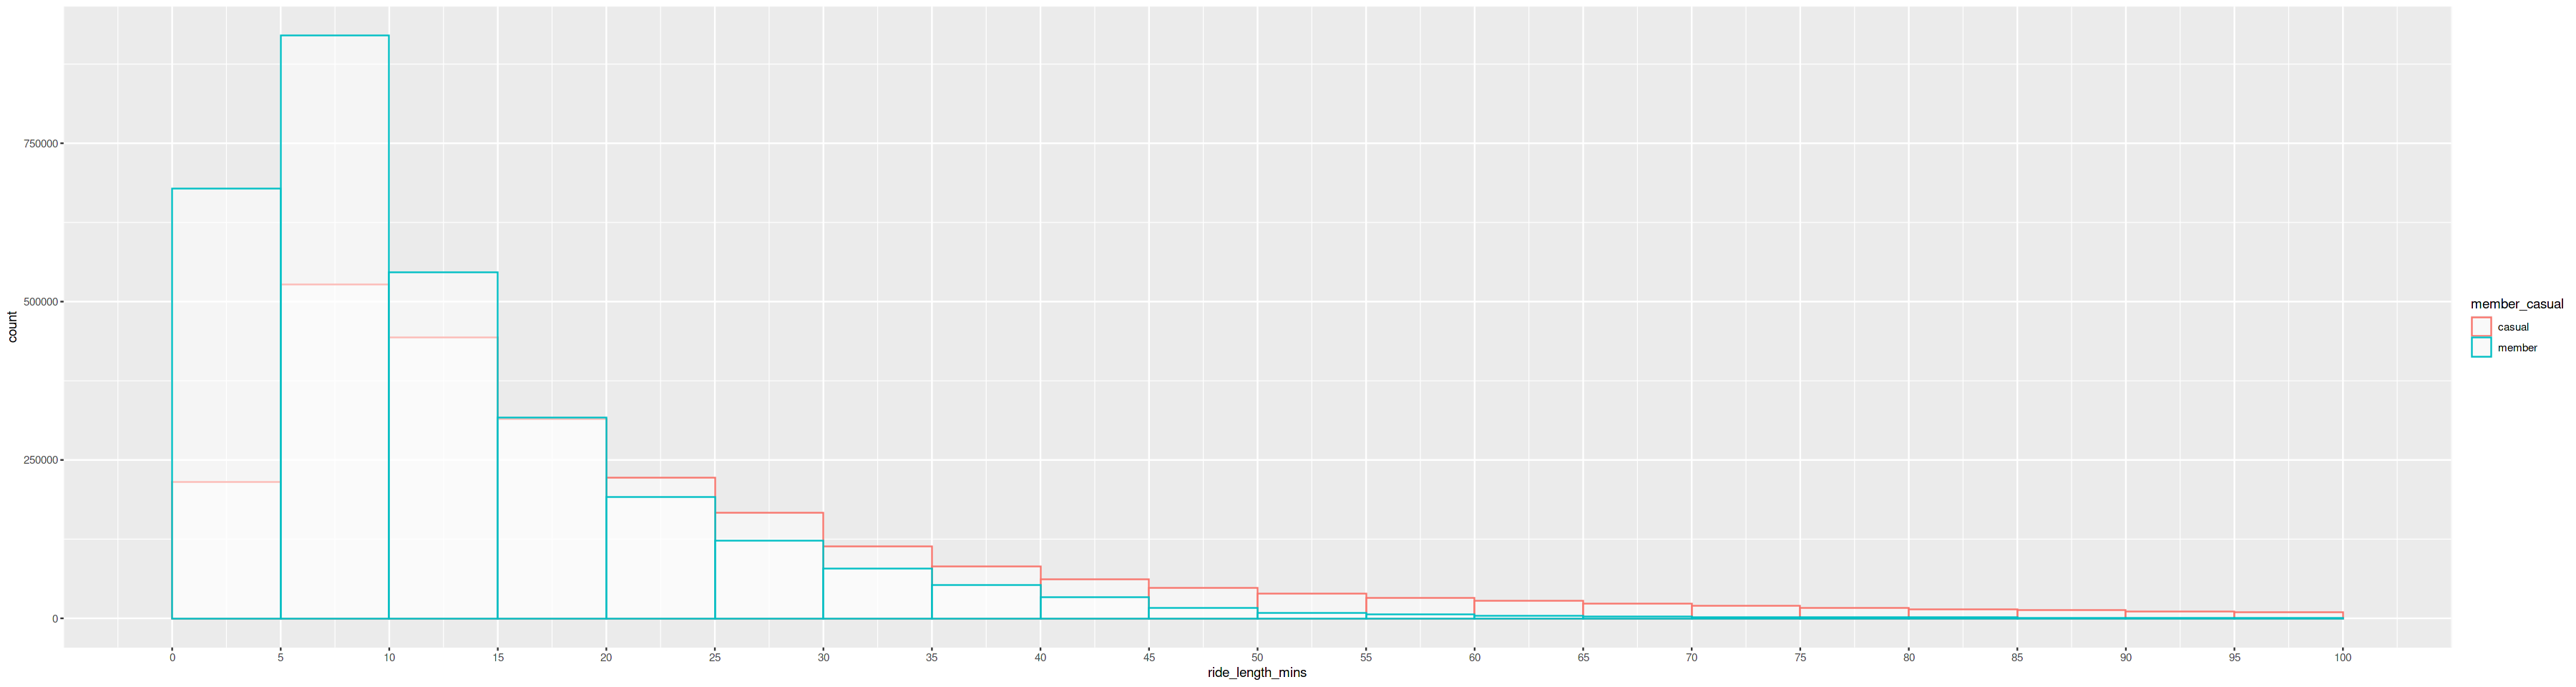

In [83]:
ggplot(df,aes(x= ride_length_mins, color= member_casual)) +
  geom_histogram(fill="white", alpha=0.5, binwidth = 5, center= 2.5, position = 'identity') +
  scale_x_continuous(limits = c(0,100), breaks = seq(0, 100, by= 5))

We can see that:  
* Members tend to ride shorter durations than casual users
* Most of the rides are less than 30 minutes
* The majority of the rides are 5 - 10 minutes for both members & casual users

**Ride distance**  

Plotting a histogram of the ride distance for both member and casual users.

Warning message:
“Removed 42239 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


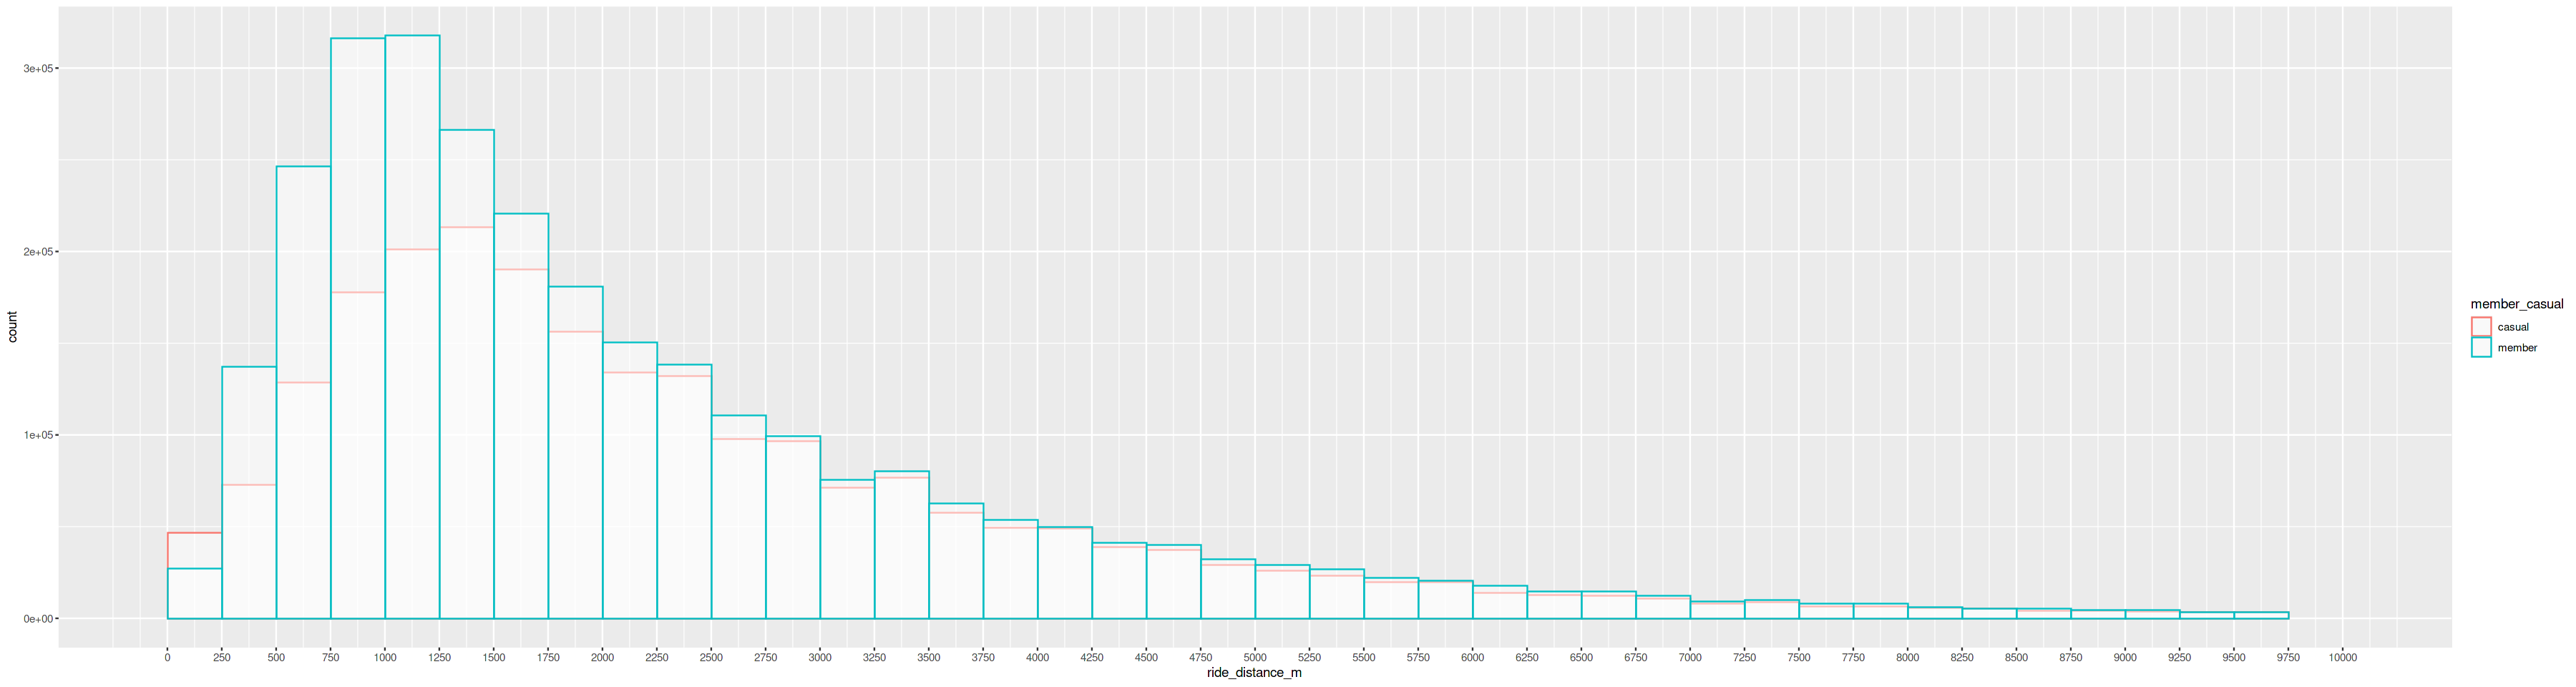

In [82]:
ggplot(df,aes(x= ride_distance_m, color= member_casual)) +
  geom_histogram(fill="white", alpha=0.5, binwidth = 250, center= 126,  position = 'identity') +
  scale_x_continuous(limits = c(0,10000), breaks = seq(0, 10000, by= 250))

We see that:  
* The vast majority of the rides were less than 5 Km
* Most of the rides are 1 - 1.25 Km long for both members & casual users

**Month**

Plotting a histogram of ride month.

Warning message:
“Removed 4 rows containing missing values (geom_bar).”


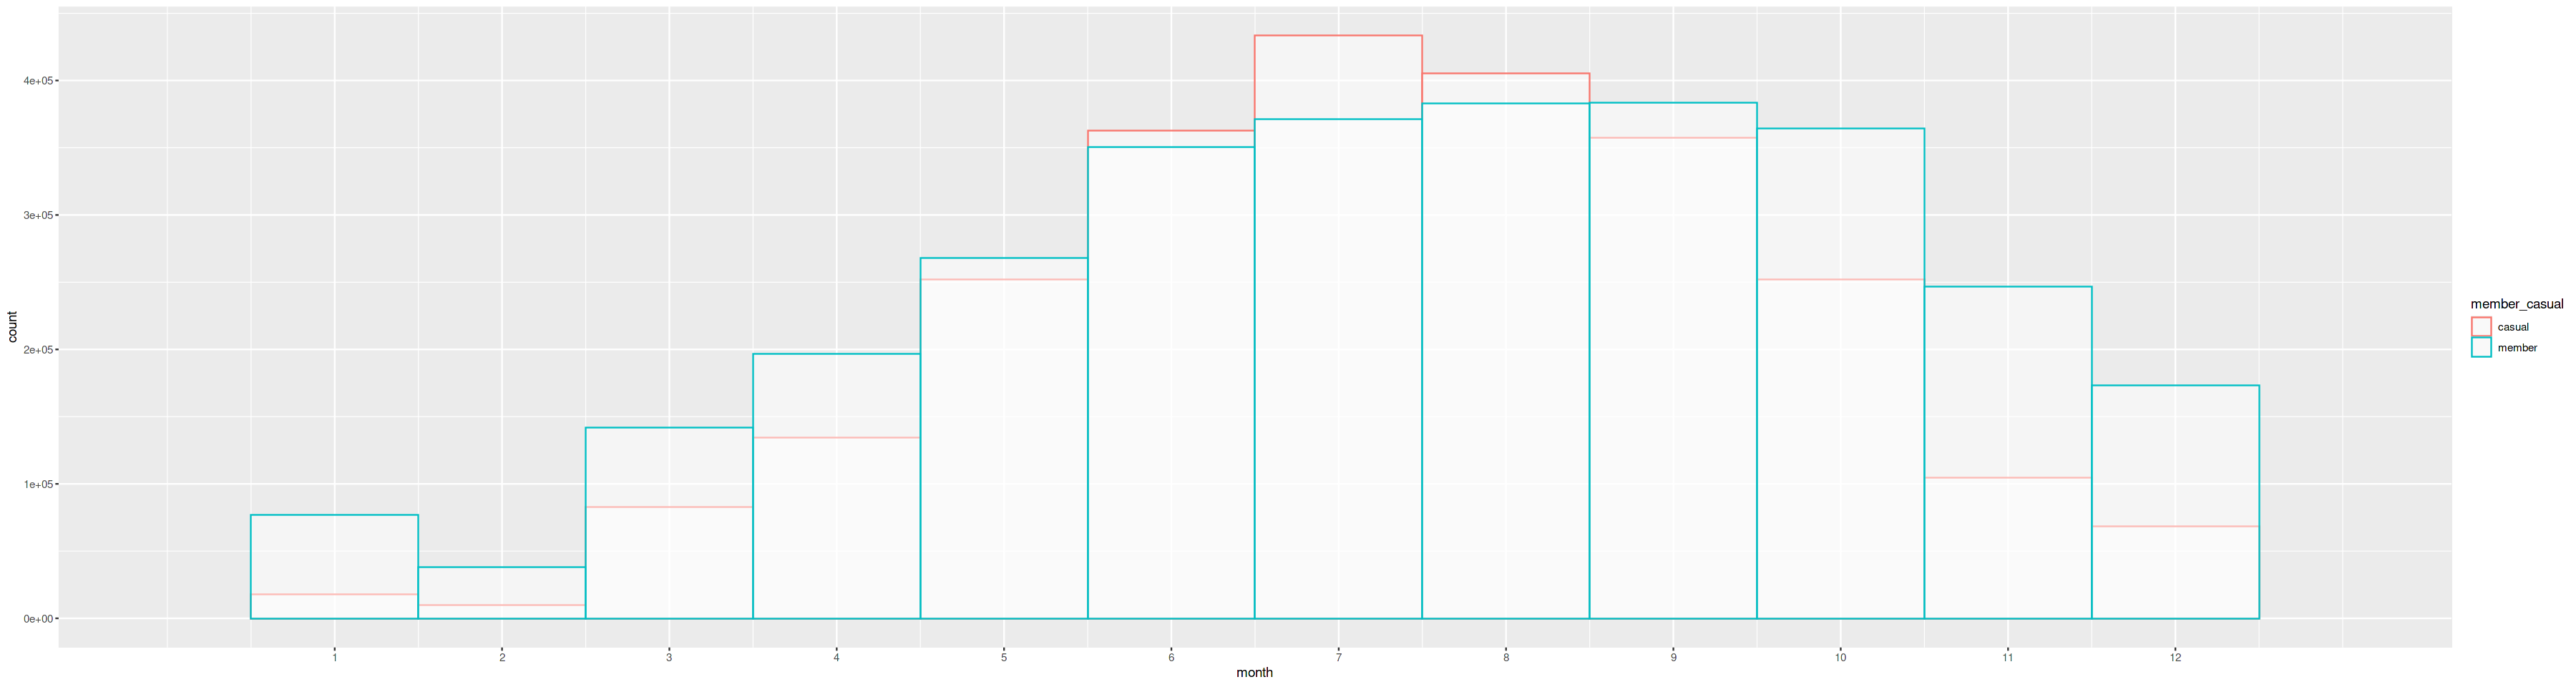

In [84]:
ggplot(df,aes(x= month, color= member_casual)) +
  geom_histogram(fill="white", alpha=0.5, binwidth = 1, center= 0, position = 'identity') +
  scale_x_continuous(limits = c(0,13), breaks = seq(1, 12, by= 1))

We see that:  
* The vast majority of the rides were in summer months.
* Members are riding all the year, with the peak in August & September.
* Casual users are riding specialy in summer, with the peak in July.
* One possible reason for this outcome is that members are riding bikes daily for work, while casuals are just riding in the nice weather.
* February had the lowest number of rides in 2021, probably due to Covid cases increasing.

**Day of week**

Plotting a histogram of the day of week.

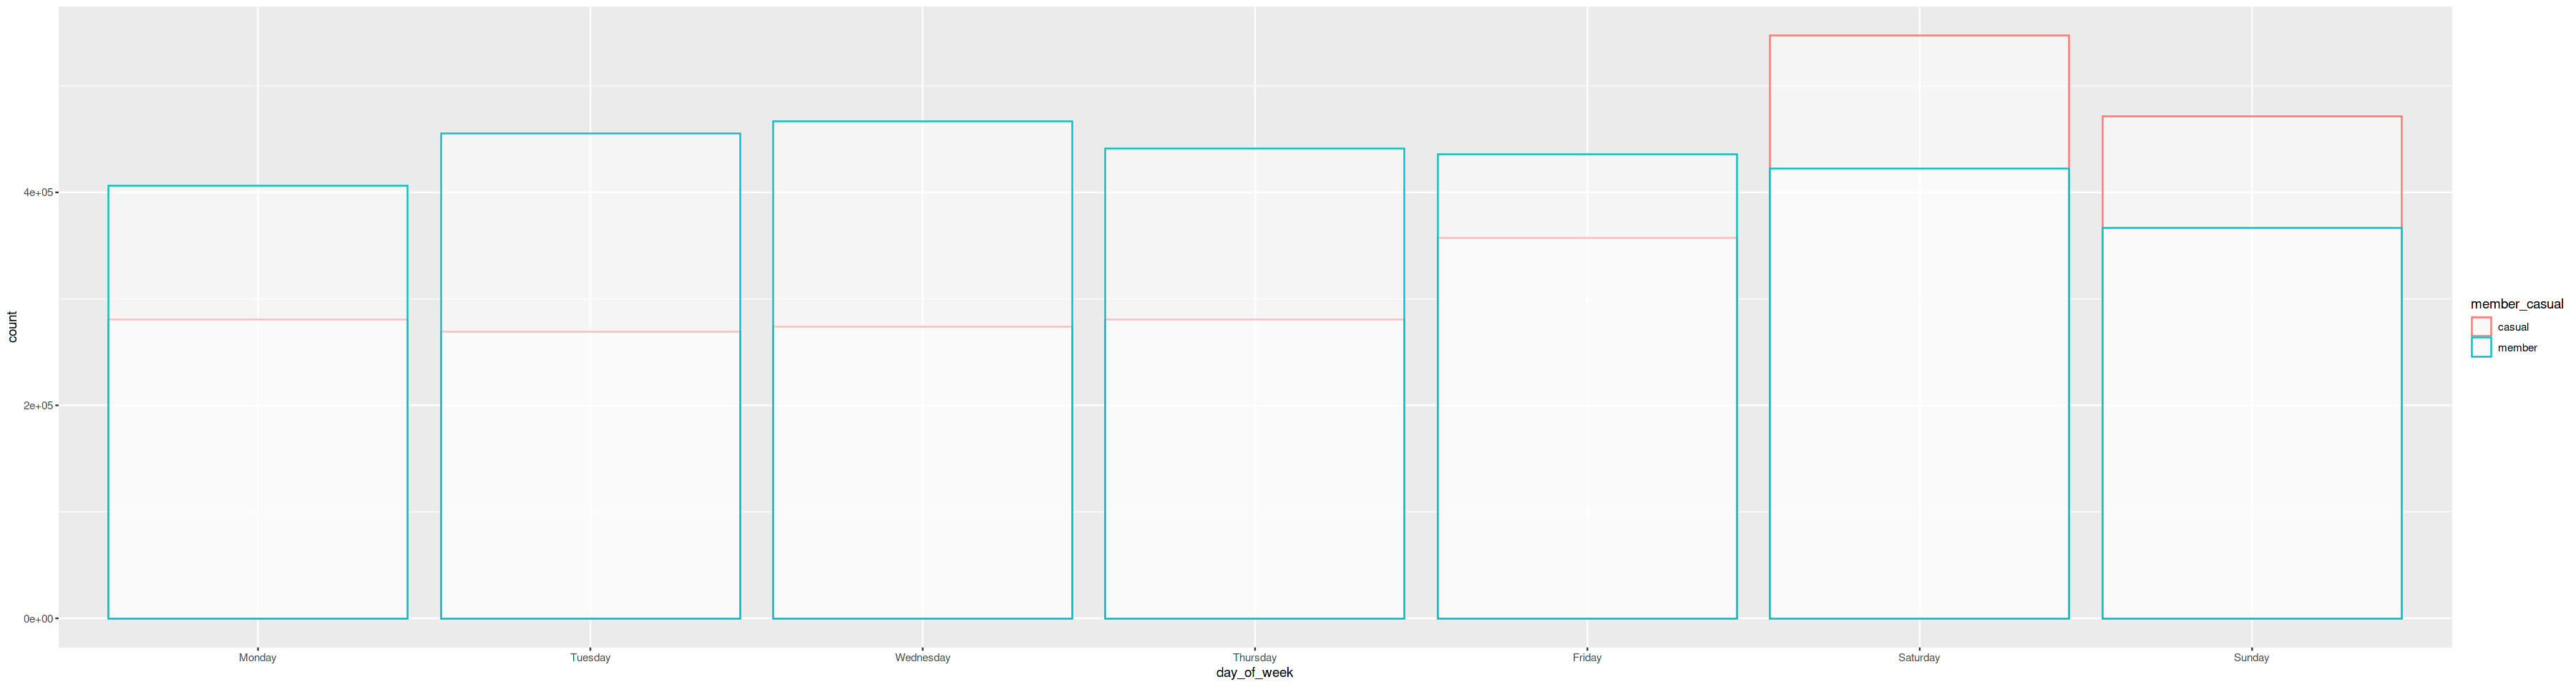

In [90]:
ggplot(df,aes(x= day_of_week, color= member_casual)) +
  geom_bar(fill="white", alpha=0.5, position = 'identity')

We see that:  
* Members are riding all days of the week, with the peak on Wednesday and decreasing a bit in weekends.
* This is inline with the previous month result, that members are riding to work every day.
* On the other side, Casuals are riding more in weekends, which also shows that casuals are only riding for fun.

**Popular stations**

Let's check the top 10 start stations and if there is a favourit for members and casuals.

First, how many stations do we have?

In [92]:
n_distinct(df$start_station_name)

[1] 848

We have 848 stations.  
We will extract this column in a seperate dataframe for further anaylsis.

In [95]:
df_station <- df$start_station_name

Add the count of each station to the df.

In [97]:
df_station <- aggregate(data.frame(count = df_station), list(start_station_name = df_station), length)

Now, we order them from high to low.

In [103]:
df_station <- df_station[order(-df_station$count),]
row.names(df_station) <- NULL

Plotting a histogram of the top 10 stations.

We need first to select the top 10 stations from the original df.

In [114]:
df_station_sub <- subset(df, start_station_name %in% head(df_station, 10)$start_station_name)

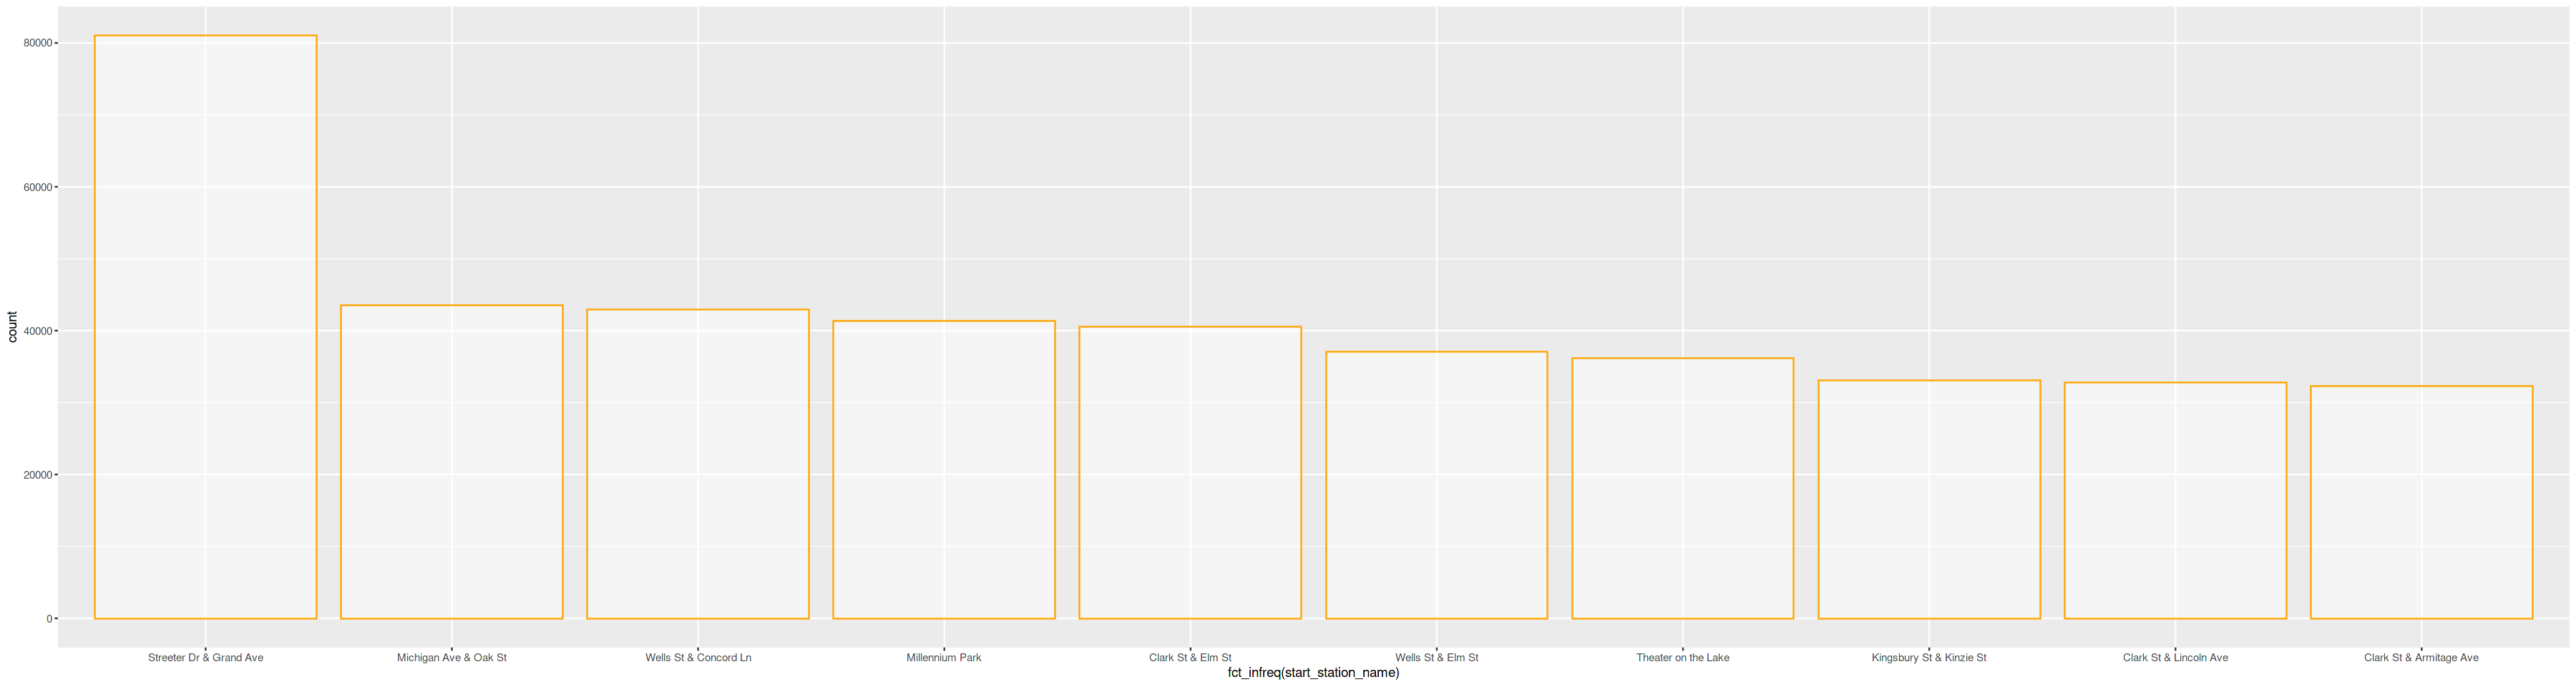

In [117]:
ggplot(df_station_sub,aes(x= fct_infreq(start_station_name))) +
  geom_bar(colour= 'orange', fill="white", alpha=0.5)

The **"Streeter Dr & Grand Ave"** is the most frequent starting station, with almost double the rides of the second one.  

Now, let's plot it for member-casual.

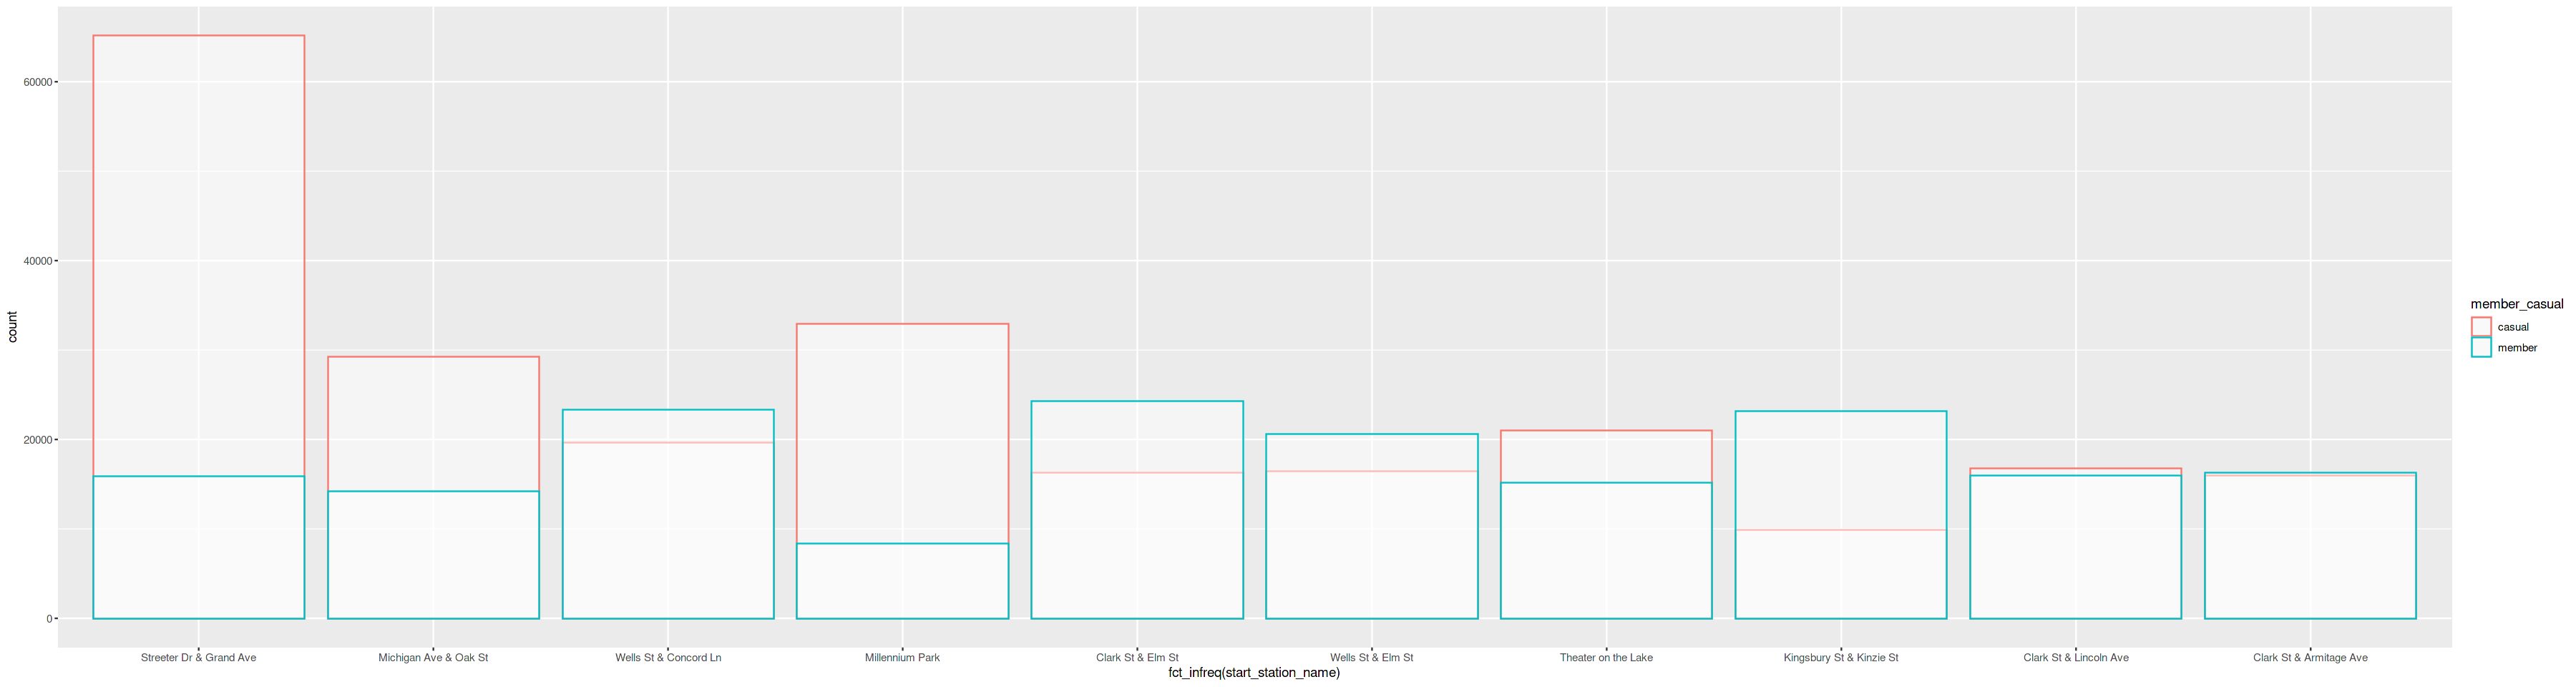

In [118]:
ggplot(df_station_sub,aes(x= fct_infreq(start_station_name), color= member_casual)) +
  geom_bar(fill="white", alpha=0.5, position = 'identity')

We see that: 
* Casual rides are the main reason that the **Streeter Dr & Grand Ave** station has the highest rank
* **Millennium Park** & **Michigan Ave & Oak St** are also popular with casual riders
* Members have no clear pereference for starting stations
* **Millennium Park** station is probably near a park, which also explains why it is more popular with casuals than members.

**Bike type**

Let's check the bike types.

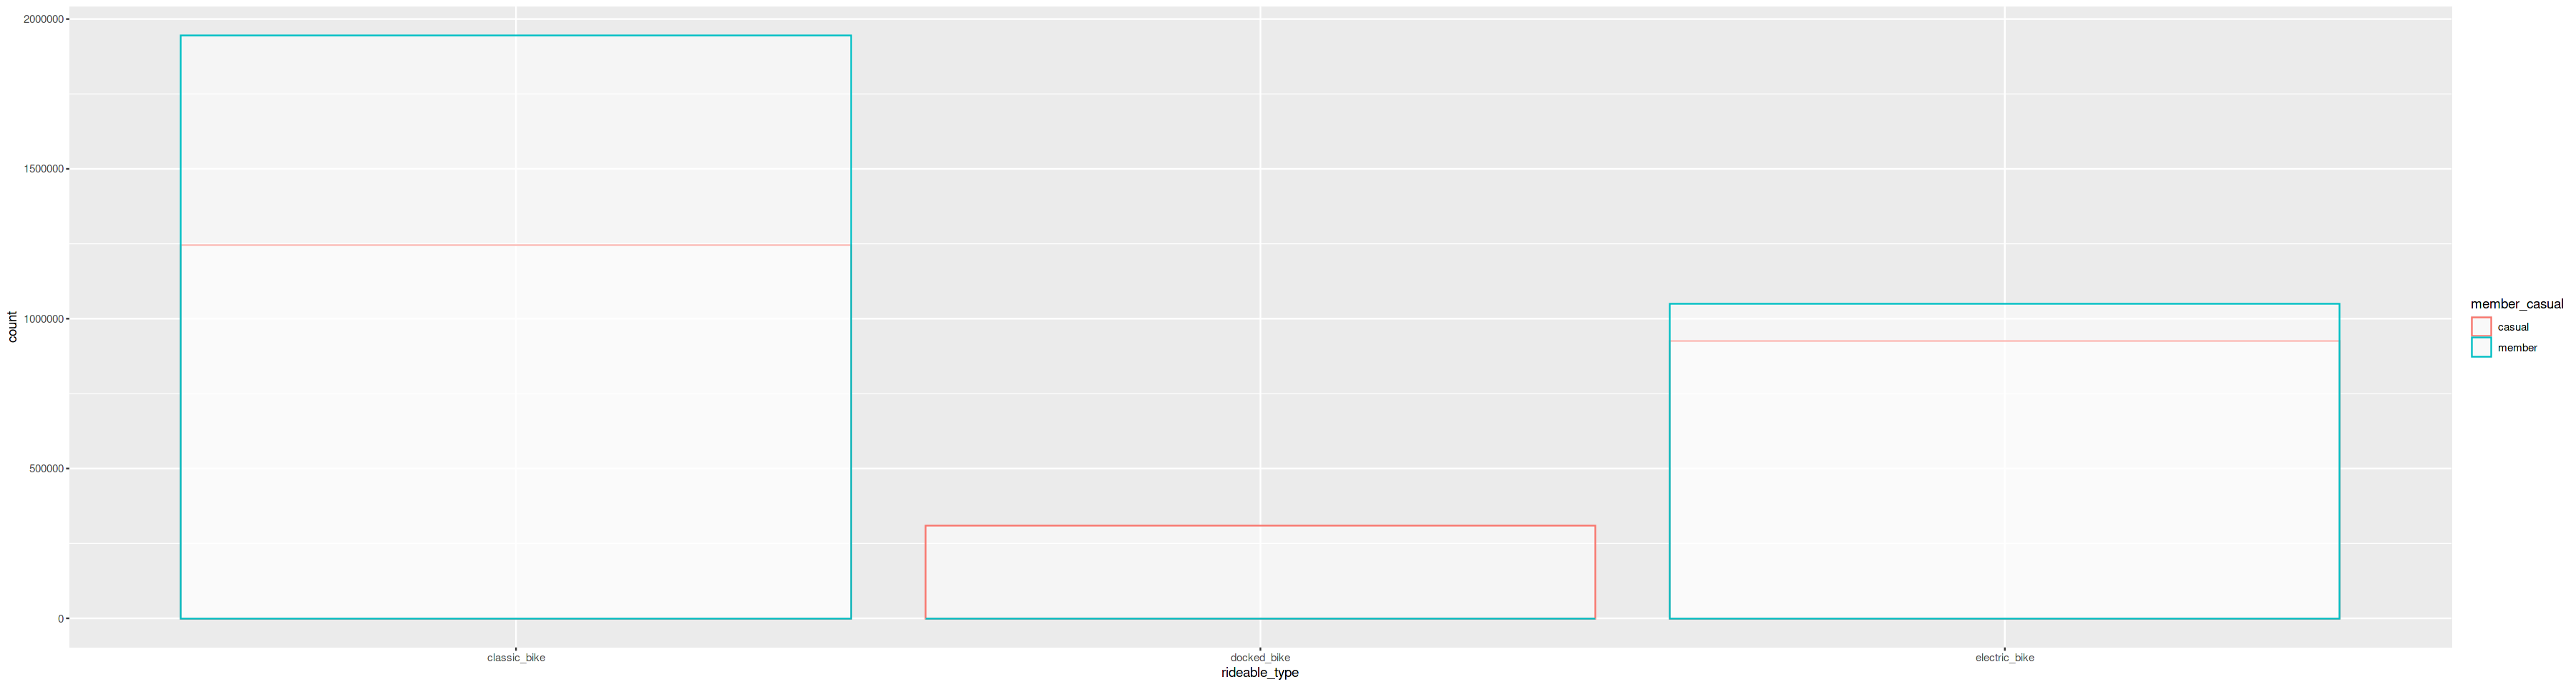

In [119]:
ggplot(df,aes(x= rideable_type, color= member_casual)) +
  geom_bar(fill="white", alpha=0.5, position = 'identity')

In [128]:
sum((df$rideable_type == "docked_bike"| df$rideable_type =="electric_bike" & df$member_casual == "casual"))
sum((df$rideable_type == "classic_bike" & df$member_casual == "casual"))

[1] 1234602

[1] 1245519

We see that:
* Casuals riding of electric & docked bikes are almost equal to riding classic bikes.
* Docked bikes were only used by casuals.

# Conclusion

* Member rides were slightly higher than casual rides in 2021 (55% & 45%).
* Members tend to ride shorter durations than casual users, but 5 - 10 minutes is the most ride duration for both.
* The vast majority of the rides were less than 5 Km and most rides are 1 - 1.25 Km long for both.
* Members are riding all year long and all days of the week, with the peak in August's & September's Wednesdays, probably for work.
* Casual users are riding mainly in summer weekends, with the peak in July's Saturdays, probably enjoying nice weather.
* **"Streeter Dr & Grand Ave"** is the most frequent starting station, mainly because of casual riders. 
* More info about this stations could explain the reason. It is also recommended to increase the number of available bikes there.
* Members have no clear pereference for starting stations.
* Casual riders are more into non-casual bikes. An idea here is to give an advantage for members on booking electric and docked bikes.